In [1]:
from intent_recognition import *
from recurrent_models import *

In [ ]:
embedding_sizes = [2048]
vocab_size = [500]

class_weights = [True]
for emb_size in embedding_sizes:
    for voc_size in vocab_size:
        for clss_w in class_weights:
            train_config = { 'use_class_weights':clss_w}
            hyperparams = {'vocab_size': voc_size, 'embedding_dim': emb_size, 'epochs': 15, 'batch_size': 32}
            for name in model_types:
                model = create_model(name)
                basic = IntentRecognition(model, hyperparams, training_times=3, train_config=train_config, verbosing=0, name=f'{name}_2048', results_file_name='rnn.csv')
                basic.train_model()
                basic.print_training_information()

# Try to manually improve even more the solution

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(GlobalMaxPooling1D())

train_config = {'use_class_weights':True}
hyperparams = {'vocab_size': 500, 'embedding_dim': 2048, 'epochs': 20, 'batch_size': 32}
basic = IntentRecognition(model, hyperparams, training_times=1, train_config=train_config, use_augmented_data=True, verbosing=1, save_results=False)
basic.train_model()
basic.print_training_information()

Number of classes in training data: 22
Training model 1/1Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.3705 - f1_score: 0.3545 - loss: 2.4114 - val_accuracy: 0.8889 - val_f1_score: 0.5764 - val_loss: 0.4703
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9436 - f1_score: 0.9356 - loss: 0.1681 - val_accuracy: 0.9467 - val_f1_score: 0.6076 - val_loss: 0.2295
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9744 - f1_score: 0.9655 - loss: 0.0642 - val_accuracy: 0.8400 - val_f1_score: 0.6099 - val_loss: 0.6344
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9647 - f1_score: 0.9624 - loss: 0.0407 - val_accuracy: 0.9689 - val_f1_score: 0.6468 - val_loss: 0.1304
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9896 - f1_score: 0.9813 - loss: 0.0196 - val_accuracy: 0.9700 - val_f1_score: 0.6420 - val_loss: 0.1289
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9951 - f1_score

In [5]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())

train_config = {'use_class_weights':True}
hyperparams = {'vocab_size': 500, 'embedding_dim': 2048, 'epochs': 20, 'batch_size': 32}
basic = IntentRecognition(model, hyperparams, training_times=1, train_config=train_config, use_augmented_data=True, verbosing=1, save_results=False)
basic.train_model()
basic.print_training_information()

Number of classes in training data: 22
Training model 1/1Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 32s 173ms/step - accuracy: 0.2386 - f1_score: 0.2415 - loss: 2.3425 - val_accuracy: 0.8578 - val_f1_score: 0.5530 - val_loss: 0.5018
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - accuracy: 0.9172 - f1_score: 0.9129 - loss: 0.1459 - val_accuracy: 0.9489 - val_f1_score: 0.6627 - val_loss: 0.1934
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 29s 168ms/step - accuracy: 0.9774 - f1_score: 0.9709 - loss: 0.0534 - val_accuracy: 0.9578 - val_f1_score: 0.6586 - val_loss: 0.1443
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - accuracy: 0.9869 - f1_score: 0.9810 - loss: 0.0245 - val_accuracy: 0.9678 - val_f1_score: 0.6616 - val_loss: 0.1313
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 27s 159ms/step - accuracy: 0.9943 - f1_score: 0.9861 - loss: 0.0140 - val_accuracy: 0.9678 - val_f1_score: 0.6651 - val_loss: 0.1318
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 28s 162ms/step - accuracy: 0.9882 - f1

# PLOT BEST MODELS

In [2]:
from plot_functions import *
import pandas as pd
df = pd.read_csv('rnn/rnn.csv_complete.csv')
df.columns = ['architecture_name', 'summary', 'run_number', 'epoch', 'training_acc',
              'training_f1', 'training_loss', 'val_acc', 'val_f1', 'val_loss',
              'vocab_size', 'embedding_dim', 'epochs', 'batch_size', 'lemmatize',
              'stem', 'remove_stopwords', 'custom_stopwords', 'padding',
              'selection_metric', 'f1_type', 'use_class_weights', 'early_stopping',
              'early_stopping_patience']
df.to_csv('temp.csv', index=False)
df = pd.read_csv('temp.csv')

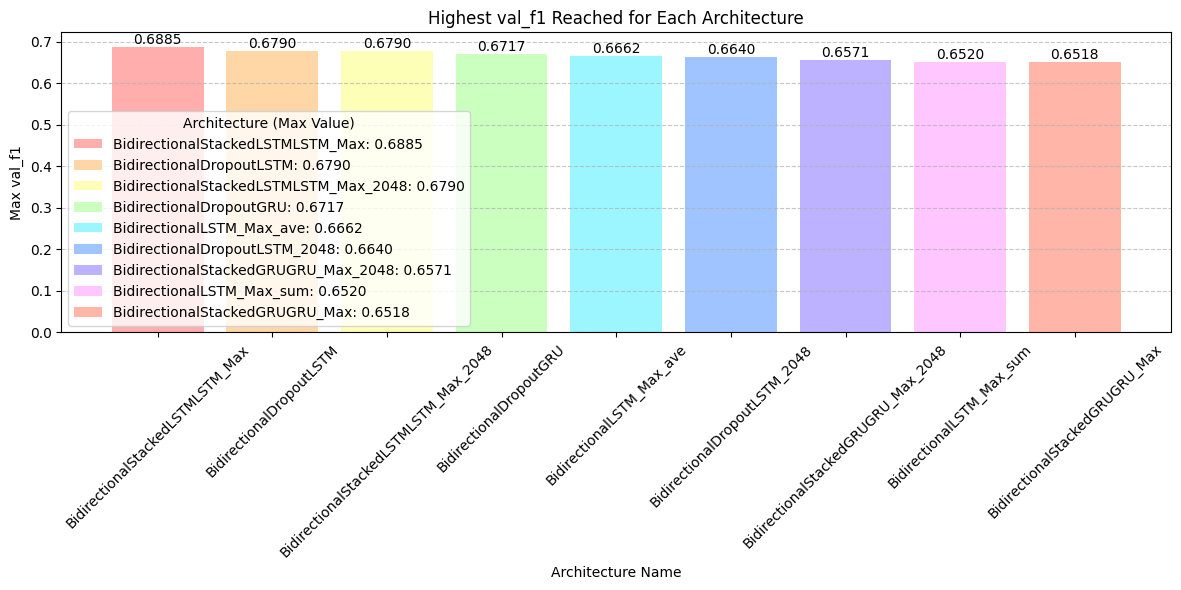

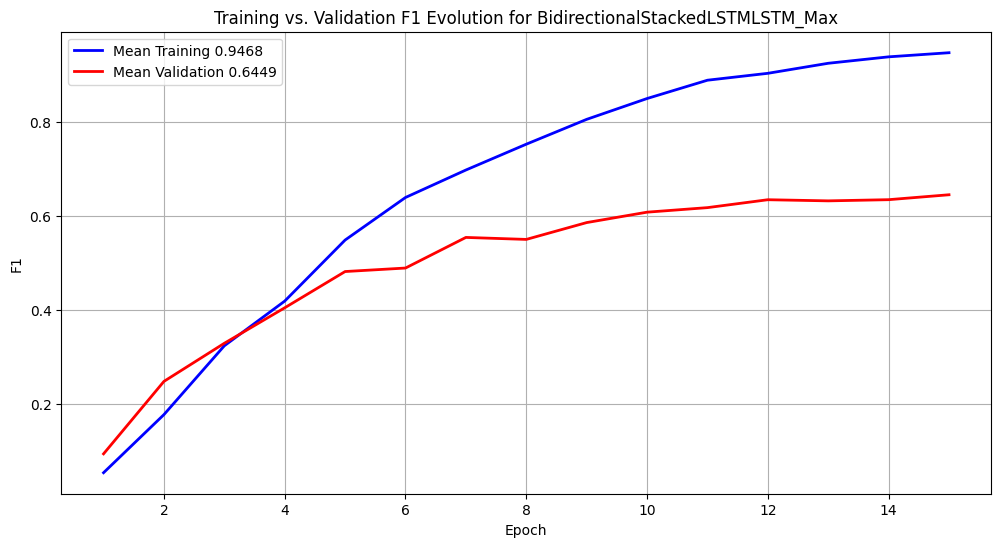

In [5]:
df = pd.read_csv('temp.csv')
plot_highest_bar(df, metric='val_f1', top_n=10)
plot_train_val_comparison(df, metric='f1', architecture_name='BidirectionalStackedLSTMLSTM_Max')